# <ins>Analyzing Stellar Data from MESA</ins>
## An Interactive Exercise

RTF, created 3/30/21
Updated 2/27/25 to streamline mesa_reader import, and replace deprecated %pylab commands.

In this Jupyter notebook exercise, you will carry out some basic analyses of stellar data from MESA using the PyMesaReader Python library. 


## Installing PyMesaReader

First, you will need to have PyMesaReader installed. To intall PyMesaReader, follow the first cell below. _The installation needs to be executed only once. Once PyMesaReader is installed on your system once, there is no need to install it again._

In [1]:
import sys
!{sys.executable} -m pip install --user mesa_reader


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


## Plotting MESA history data

For our first example, we will make use of the history file to plot the time evolution of the MESA stellar model on a theorist's HR diagram of log luminosity versus log T. 

The code below is simply explained. PyMesaReader is imported as <code>mr</code>. We change into a directory with the LOGS directory for a MESA run, and read in the <code>history.data</code> file, which is stored in the LOGS directory. We then store the log of the effective surface temperature and the log of the stellar luminoisty as log_Teff and Log_L, respectively. These quantities are stored as NumPy arrays, and are then plotted to form the HR diagram.

Many other analyses are possible with the history data. The command 

<code>
h.bulk_names
</code>

below returns all of the fields stored. The <code>'LOGS/history.data'</code> file contains within it many global quantities, representing one value per timestep of the simulation. Small modifications can easily be made, for example, to plot the log luminosity versus time, or the log mass versus log radius of the star, or even more exotic examples. 

By default, MESA stores the history fields in the file <code>$MESA_DIR/star/defaults/history_columns.list</code>. Many more entries are possible; you can copy this file to your MESA run directory and modify it to suit your needs. History entries marked with a leading <\code>!</code> are commented out. Simply delete the leading <\code>!</code> to comment it in.

This history.data file contains these fields:  ('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alpha', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'kh_timescale', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_entropy', 'center_omega', 'cente

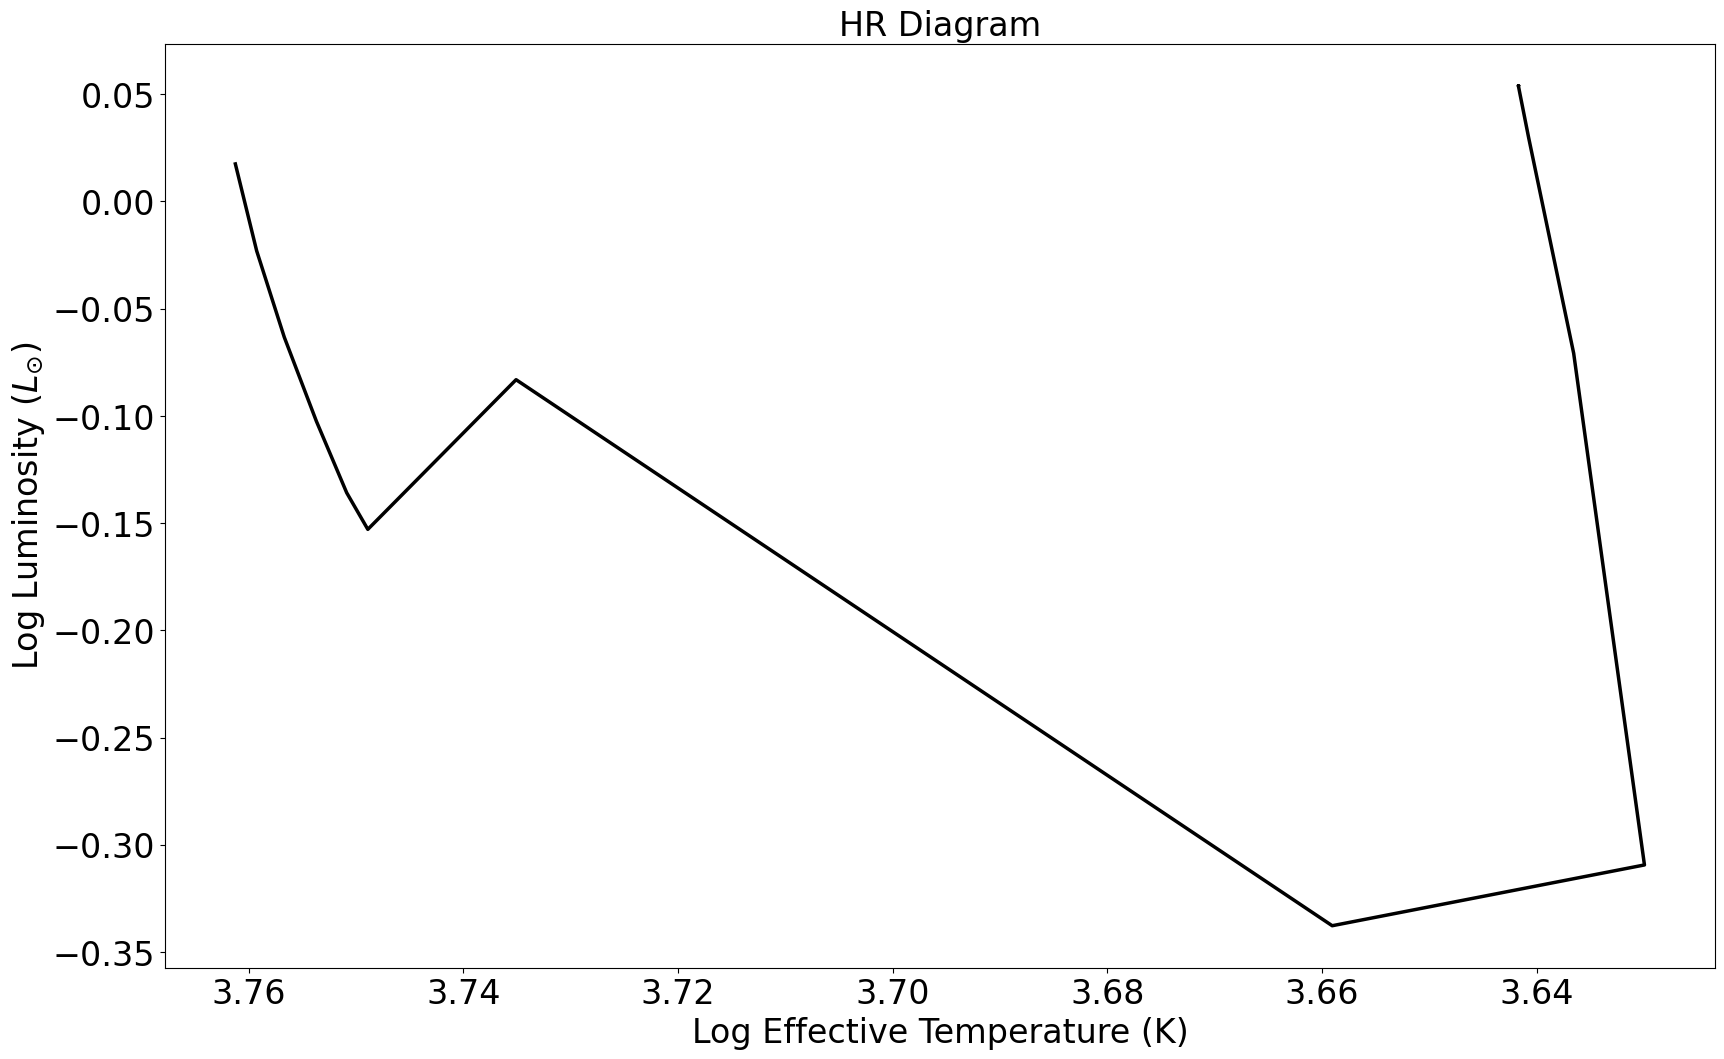

In [13]:
# Ensures inline display in Jupyter
%matplotlib inline  


import matplotlib.pyplot as plt
import mesa_reader as mr
import os

# Store the current working directory
cwd = os.getcwd()

# Set the MESA directory which needs to be analyzed
mesa_run_directory = "/Users/rfisher1/research/programs/_mesa_docker/MESA-Docker/docker_work/1M_pre_ms_to_wd"
os.chdir(mesa_run_directory)

# Read in the history file
h = mr.MesaData("LOGS/history.data")

# Display all available fields
print("This history.data file contains these fields: ", h.bulk_names)

# Extract relevant data
log_Teff = h.log_Teff
log_L = h.log_L

# Generate a "theorist's" HR diagram of log luminosity versus log T
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(log_Teff, log_L, color="black", linewidth=2.5)
ax.set_xlabel("Log Effective Temperature (K)", fontsize=24)
ax.set_ylabel(r"Log Luminosity ($L_{\odot}$)", fontsize=24)
ax.set_title("HR Diagram", fontsize=24)

# Set tick label sizes
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

# Reverse temperature axis for HR diagram
ax.set_xlim(ax.get_xlim()[::-1])

# Change back to the original working directory
os.chdir(cwd)

# Save HR diagram as a PDF
plt.savefig("mesa_hr_diagram.pdf", format="pdf")

# Show the plot inline
plt.show()


## Plotting MESA profile data

For our next example, we will plot the time evolution of the internal structure of a MESA stellar model. Individual timesteps in the MESA simulation are called _models_ in MESA terminology, while the spatially-dependent stellar structure functions ($\rho (r), T (r)$, etc.) are called _profiles_. In this example, we plot the profile of temperature and density within the star for the final profile stored during a MESA run.

This example is easily generalized to plot any profile. The <code>log.profile_data()</code> command below can be modified to select any profile or any model.

Also note that similar to the history file structure, by default, MESA stores the profile fields in the file <code>$MESA_DIR/star/defaults/profile_columns.list</code>. The basic quantities include <code>R, mass, Rho, T, P </code>. The radii and massses are in solar units. Be careful -- Python is case sensitive, so <code>R</code> is _not_ equivalent to <code>r</code>.

Many more profile entries are possible; you can modify the <code><code>profile_columns.list</code> file in your MESA run directory to suit your needs. Profile entries marked with a leading <\code>!</code> are commented out. Simply delete the leading <\code>!</code> to comment that field in. Some important profile fields are commented out by default, and you should consider adding them back in, including <code>luminosity, net_nuclear_energy</code>. Also the global entry <code>star_age</code>, which has only a single value per profile, allows you to easily connect a given profile to a physical time.

Stellar age =  9.262921463671312  Gyr


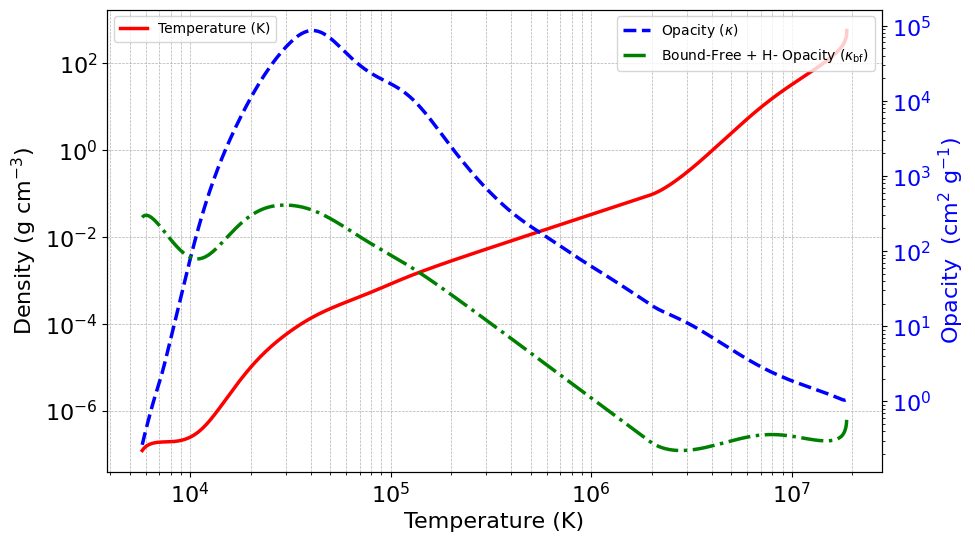

In [14]:
# Ensure Matplotlib displays plots inline in Jupyter
%matplotlib inline  

import mesa_reader as mr
import os
import matplotlib.pyplot as plt

# Bound-free opacity function
def bound_free_opacity(rho, T, X=0.7, Z=0.02):
    """Computes bound-free opacity using a simple analytic approximation."""
    return 1e24 * Z * (1 + X) * rho / T**3.5

# H- opacity function
def H_minus_opacity(rho, T, X=0.7, Z=0.02):
    """Computes H- opacity using an empirical approximation."""
    return 2.5e-32 * (Z + 0.001) / (rho**0.5 * T**2.5)
    
# Store the current working directory
cwd = os.getcwd()

# Set the MESA directory which needs to be analyzed
mesa_run_directory = "/Users/rfisher1/research/programs/_mesa_docker/MESA-Docker/docker_work/1M_pre_ms_to_wd"
os.chdir(mesa_run_directory)

# Load entire LOG directory information
log = mr.MesaLogDir("./LOGS_to_end_core_h_burn")

# Grab the last profile in this directory by default
p = log.profile_data()

# Sample formats to extract another profile_number or model_number -- see https://billwolf.space/py_mesa_reader/MesaLogDir.html for more
#p = log.profile_data(profile_number = 2)
#p = log.profile_data(model_number = 200)
print ("Stellar age = ", p.star_age / 1.e9, " Gyr")

# Set figure size explicitly using Matplotlib
fig, ax1 = plt.subplots(figsize=(10, 6))

font_size = 16

# Plot Temperature vs Density on the primary y-axis
ax1.loglog(p.T, p.Rho, color="red", linewidth=2.5, label="Temperature (K)")
ax1.set_ylabel(r"Density ($\mathrm{g \ cm^{-3}}$)", fontsize=font_size)
ax1.set_xlabel(r"Temperature (K)", fontsize=font_size, color="black")
ax1.tick_params(axis="y", labelcolor="black", labelsize=font_size)

# Compute analytic bound-free opacity
kappa_bf = bound_free_opacity(p.Rho, p.T)
kappa_Hminus = H_minus_opacity(p.Rho, p.T)  # H- opacity
kappa_total_analytic = kappa_bf + kappa_Hminus  # Combined analytic opacity

# Create a second y-axis for Opacity
ax2 = ax1.twinx()
ax2.loglog(p.T, p.opacity, color="blue", linewidth=2.5, linestyle="dashed", label="Opacity ($\kappa$)")
ax2.loglog(p.T, kappa_total_analytic, color="green", linewidth=2.5, linestyle="dashdot", label="Bound-Free + H- Opacity ($\kappa_{\mathrm{bf}}$)")
ax2.set_ylabel(r"Opacity  ($\mathrm{cm^{2}\ g^{-1}}$)", fontsize=font_size, color="blue")
ax2.tick_params(axis="y", labelcolor="blue", labelsize=font_size)

# Adjust tick sizes and add grid
ax1.tick_params(axis="x", labelsize=font_size)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Change back to the original working directory
os.chdir(cwd)

# Output the MESA profile to a file in PDF format
plt.savefig("mesa_profile.pdf", format="pdf")

# Display the plot inline in Jupyter
plt.show()